In [119]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
import torchvision as tv
from torch.utils.data import DataLoader,TensorDataset
from torch import Tensor
import datetime

### Load galstar data

In [3]:
galstar = pd.read_csv('/usr/workspace/hofgard1/challenge_setup/data_and_information/galstar.csv')

In [4]:
galstar

,Unnamed: 0,y,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 5400,Unnamed: 5401,Unnamed: 5402,Unnamed: 5403,Unnamed: 5404,Unnamed: 5405,Unnamed: 5406,Unnamed: 5407,Unnamed: 5408,Unnamed: 5409
0,1,0,0.005208,0.005283,0.005284,0.005249,0.005268,0.005311,0.005342,0.005191,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
1,2,0,0.005264,0.005220,0.005248,0.005340,0.005237,0.005248,0.005251,0.005168,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
2,3,0,0.005314,0.005302,0.005279,0.005258,0.005294,0.005229,0.005281,0.005198,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
3,4,0,0.005190,0.005255,0.005213,0.005263,0.005296,0.005288,0.005243,0.005332,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
4,5,0,0.005163,0.005178,0.005284,0.005220,0.005249,0.005287,0.005210,0.005289,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31793,31794,1,0.005299,0.005320,0.005284,0.005161,0.005311,0.005254,0.005347,0.005219,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
31794,31795,1,0.005254,0.005231,0.005184,0.005195,0.005266,0.005277,0.005281,0.005260,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
31795,31796,1,0.005348,0.005299,0.005289,0.005273,0.005278,0.005297,0.005321,0.005338,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
31796,31797,1,0.005380,0.005356,0.005259,0.005239,0.005345,0.005306,0.005325,0.005305,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257


In [5]:
galstar = galstar.iloc[:,1:]
galstar_labels = galstar['y']
galstar_images = galstar.iloc[:,1:]

In [8]:
galstar_images.shape

(31798, 5408)

8, 26x26 images per object, 4 different bands, (think of these like the RBG Pixels) and 4 Point Spread Function Images

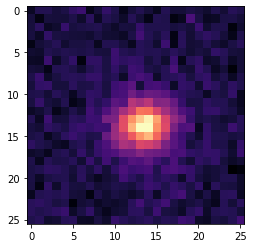

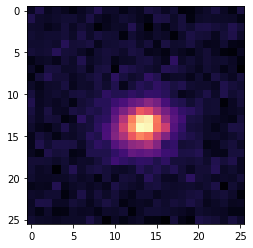

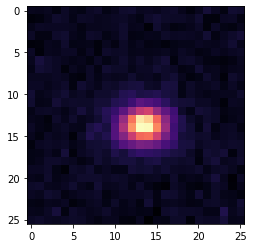

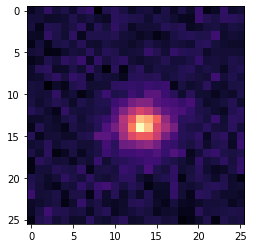

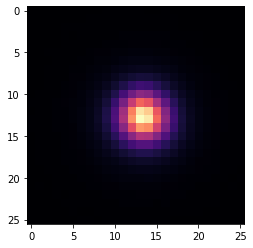

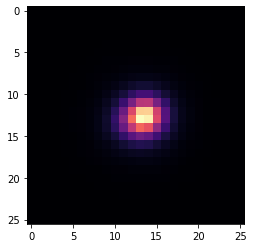

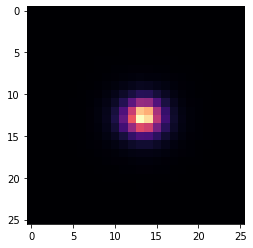

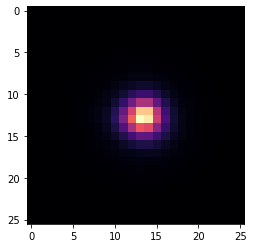

In [6]:
data = galstar_images.values
labels = galstar_labels.values

    
data_pre = data.reshape(31798,8,26,26)  #griz (psf-g, psf-r,psf-i,psf-z) 8 channels,they claim up to mag27 in the i band


for i in range(8):
    plt.imshow(data_pre[0,i,:,:],cmap='magma')
    plt.show()

### Normalization
could try different normalization here

In [9]:
vec_one_ = np.ones((26,26))

for i in tqdm(range(31798)):
    for j in range(8):
        
        
        data_pre[i,j,:,:] = data_pre[i,j,:,:]- np.amin(data_pre[i,j,:,:])*vec_one_  #background subtract
        data_pre[i,j,:,:] = data_pre[i,j,:,:] / np.max(data_pre[i,j,:,:])  #normalize between 0 and 1
        
        assert np.max(data_pre[i,j,:,:]) ==1 and np.min(data_pre[i,j,:,:]) ==0,'check normalization'


100%|██████████| 31798/31798 [00:22<00:00, 1415.25it/s]


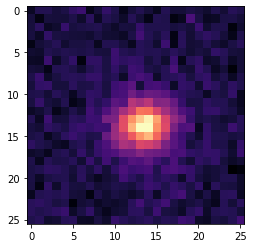

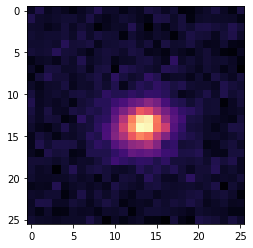

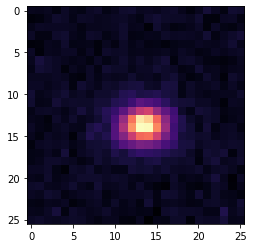

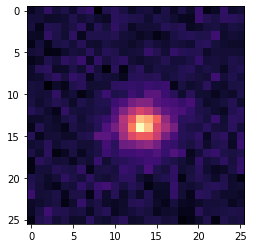

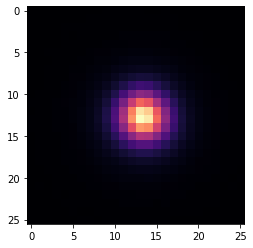

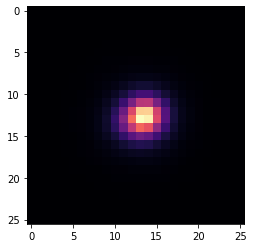

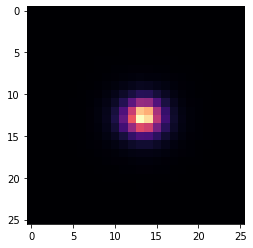

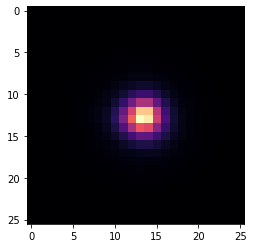

In [10]:
for i in range(8):
    plt.imshow(data_pre[0,i,:,:],cmap='magma')
    plt.show()

### Split data into train, test, validation

In [11]:
from sklearn.model_selection import train_test_split

In [28]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
train,test = train_test_split(galstar, stratify = galstar.y,test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
validation,test = train_test_split(test,stratify=test.y,test_size=test_ratio/(test_ratio + validation_ratio))

In [29]:
train

,y,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 5400,Unnamed: 5401,Unnamed: 5402,Unnamed: 5403,Unnamed: 5404,Unnamed: 5405,Unnamed: 5406,Unnamed: 5407,Unnamed: 5408,Unnamed: 5409
14034,0,0.005234,0.005252,0.005329,0.005215,0.005330,0.005180,0.005257,0.005265,0.005294,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
18846,1,0.005284,0.005297,0.005307,0.005246,0.005308,0.005273,0.005320,0.005322,0.005286,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
28529,1,0.005263,0.005270,0.005276,0.005283,0.005241,0.005211,0.005329,0.005199,0.005230,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
14862,0,0.005193,0.005206,0.005346,0.005251,0.005292,0.005230,0.005257,0.005215,0.005356,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
17128,0,0.005332,0.005318,0.005216,0.005282,0.005282,0.005299,0.005299,0.005241,0.005322,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20209,1,0.005256,0.005256,0.005256,0.005258,0.005256,0.005256,0.005256,0.005257,0.005257,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256,0.005257
30205,1,0.005258,0.005262,0.005259,0.005249,0.005331,0.005258,0.005204,0.005218,0.005279,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
14246,0,0.005252,0.005296,0.005342,0.005320,0.005377,0.005353,0.005226,0.005372,0.005306,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256,0.005256
6667,0,0.005338,0.005257,0.005326,0.005231,0.005257,0.005276,0.005275,0.005262,0.005257,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257


In [30]:
test

,y,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 5400,Unnamed: 5401,Unnamed: 5402,Unnamed: 5403,Unnamed: 5404,Unnamed: 5405,Unnamed: 5406,Unnamed: 5407,Unnamed: 5408,Unnamed: 5409
21984,1,0.005165,0.005252,0.005265,0.005350,0.005239,0.005255,0.005260,0.005335,0.005307,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
22640,1,0.005285,0.005181,0.005207,0.005342,0.005316,0.005205,0.005292,0.005259,0.005224,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
23322,1,0.005290,0.005207,0.005219,0.005139,0.005270,0.005273,0.005234,0.005327,0.005274,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
4829,0,0.005386,0.005388,0.005279,0.005302,0.005235,0.005203,0.005245,0.005297,0.005308,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256,0.005257,0.005257
26531,1,0.005294,0.005300,0.005266,0.005253,0.005246,0.005262,0.005292,0.005115,0.005350,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,0,0.005256,0.005256,0.005256,0.005256,0.005257,0.005256,0.005257,0.005256,0.005257,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
2757,0,0.005335,0.005234,0.005237,0.005203,0.005192,0.005218,0.005255,0.005251,0.005257,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
25099,1,0.005345,0.005258,0.005272,0.005275,0.005273,0.005206,0.005252,0.005286,0.005323,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256,0.005257,0.005257,0.005256
3432,0,0.005275,0.005267,0.005278,0.005265,0.005276,0.005273,0.005253,0.005249,0.005314,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256,0.005256


In [31]:
validation

,y,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 5400,Unnamed: 5401,Unnamed: 5402,Unnamed: 5403,Unnamed: 5404,Unnamed: 5405,Unnamed: 5406,Unnamed: 5407,Unnamed: 5408,Unnamed: 5409
13231,0,0.005118,0.005230,0.005241,0.005286,0.005320,0.005186,0.005279,0.005248,0.005321,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256,0.005257,0.005256
12484,0,0.005298,0.005436,0.005246,0.005341,0.005260,0.005257,0.005265,0.005252,0.005259,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
28840,1,0.005226,0.005303,0.005239,0.005206,0.005280,0.005261,0.005262,0.005301,0.005304,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
27415,1,0.005227,0.005199,0.005262,0.005249,0.005246,0.005274,0.005280,0.005248,0.005296,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
11657,0,0.005240,0.005192,0.005270,0.005225,0.005301,0.005280,0.005203,0.005201,0.005302,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,1,0.005386,0.005226,0.005306,0.005297,0.005293,0.005391,0.005369,0.005280,0.005228,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
21145,1,0.005165,0.005230,0.005139,0.005257,0.005374,0.005294,0.005216,0.005262,0.005240,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
23222,1,0.005273,0.005281,0.005321,0.005256,0.005256,0.005248,0.005192,0.005245,0.005283,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
25653,1,0.005322,0.005235,0.005273,0.005272,0.005244,0.005253,0.005265,0.005166,0.005315,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257


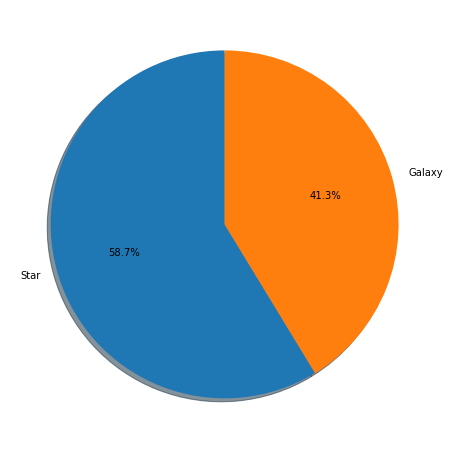

In [32]:
label = 'Star','Galaxy'
plt.figure(figsize = (8,8))
plt.pie(train.groupby('y').size(), labels = label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

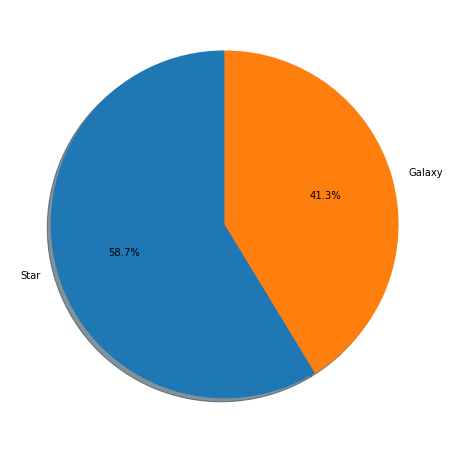

In [107]:
label = 'Star','Galaxy'
plt.figure(figsize = (8,8))
plt.pie(validation.groupby('y').size(), labels = label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [37]:
def process_data(dataset):
    labels = dataset['y'].values
    images = dataset.iloc[:,1:].values
    images = images.reshape(len(dataset),8,26,26)
    vec_one_ = np.ones((26,26))

    for i in tqdm(range(len(dataset))):
        for j in range(8):


            images[i,j,:,:] = images[i,j,:,:]- np.amin(images[i,j,:,:])*vec_one_  #background subtract
            images[i,j,:,:] = images[i,j,:,:] / np.max(images[i,j,:,:])  #normalize between 0 and 1

            assert np.max(data_pre[i,j,:,:]) ==1 and np.min(data_pre[i,j,:,:]) ==0,'check normalization'
    return labels,images


In [38]:
train_labels,train_images = process_data(train)

100%|██████████| 23848/23848 [00:19<00:00, 1248.73it/s]


In [39]:
val_labels,val_images = process_data(validation)
test_labels,test_images = process_data(test)

100%|██████████| 3180/3180 [00:02<00:00, 1280.41it/s]


### Shuffle data, and transform to tensors

In [44]:
train_labels = train_labels.reshape(-1,1)
val_labels = val_labels.reshape(-1,1)

train_tensor = TensorDataset(Tensor(train_images),Tensor(train_labels))
val_tensor = TensorDataset(Tensor(val_images),Tensor(val_labels))
test_tensor = TensorDataset(Tensor(test_images),Tensor(test_labels))

In [71]:
train_loader = torch.utils.data.DataLoader(dataset=train_tensor,batch_size=64,shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_tensor,batch_size=64,shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_tensor,batch_size=64,shuffle=False)

In [72]:
dataiter = iter(val_loader)
img,label = dataiter.next()

### Define CNN Model

In [49]:
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

device = torch.device(device)
print(device)

cuda:0


In [88]:
# Set parameters

# Number of internal nodes of the nn
nb_nodes = 32
batch_size=64
epochs = 300
lr = .001
input_channels = 8
pool_size = 2
dropout = 0.25

We define a simple CNN with 2 convolutional layers, a max pooling layer after each convolutional layer, and dropout after each convolution layer, and then with 3 dense linear layers. 

In [97]:
class NewNet(nn.Module):
    def __init__(self):
        super().__init__()        
        
        self.conv1 = nn.Conv2d(int(input_channels),int(nb_nodes),3,stride = 1,padding=0)#16,24x24 ()
        self.pool1 = nn.MaxPool2d(pool_size,pool_size)
        self.dropout1 = nn.Dropout(p=dropout)
        self.conv2 = nn.Conv2d(int(nb_nodes),int(nb_nodes/2),3,stride =1,padding = 0) #22x22,32#  batchnorm
        self.pool2 = nn.MaxPool2d(pool_size,pool_size)
        self.dropout2 = nn.Dropout(p=dropout)
        self.fc1 = torch.nn.Linear(16*5*5, 100) # 100 is last.
        self.fc2 = torch.nn.Linear(100, 50) # 100 is first, 50 is last.
        self.fc3 = torch.nn.Linear(50, 1) # 50 is first, 20 is last.
        
    def forward(self,x):
        x = self.dropout1(self.pool1(F.relu(self.conv1(x)))) # max_pool2d
        x = self.dropout2(self.pool2(F.relu(self.conv2(x))))
        #print(x.shape)
        x = torch.flatten(x,1)
        #print(x.shape)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x =  torch.sigmoid(self.fc3(x)) #binary, 0,1
        
        return x
model = NewNet().to(device)

In [76]:
from sklearn.metrics import accuracy_score
def eval(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred>0.5)
    return accuracy 

Train the model, store train and validation losses.

In [131]:
criterion = nn.BCELoss() 


optimizer = torch.optim.Adam(model.parameters(),lr = 0.0002,weight_decay = 1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, verbose=True)

# lists to store training and validation losses
train_loss_hist = list()
val_loss_hist = list()
train_acc_hist = list()
val_acc_hist = list()
    
num_epochs = 100

for epoch in tqdm(range(num_epochs)):
    
    start_time = datetime.datetime.now()
    
    running_loss = 0
    count_train_batches = 0
    running_acc = 0
    for inputs,labels in train_loader:
        inputs,labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs,labels)
        acc = eval(labels.cpu(),outputs.cpu())
        running_acc += acc
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
        
        count_train_batches += 1
        
    # train loss for this particular epoch
    train_loss_hist.append(running_loss / count_train_batches)
    train_acc_hist.append(running_acc/count_train_batches)
    
    # Validation
    with torch.set_grad_enabled(False):
        val_loss = 0
        count_val_samples = 0
        running_acc = 0
        for inputs, labels in val_loader:
            # Transfer to GPU
            inputs, labels = inputs.to(device), labels.to(device)
            # predict validation data - run model forward
            predictions = model(inputs)
            # MSE for tasks
            val_loss += criterion(predictions, labels)
            acc = eval(labels.cpu(),predictions.cpu())
            running_acc += acc
            count_val_samples += 1
        val_loss_hist.append(val_loss.item() / count_val_samples)
        val_acc_hist.append(running_acc/count_val_samples)
    
    epochs_str = str(epoch)
    tr_loss = str(train_loss_hist[-1])
    val_loss = str(val_loss_hist[-1])
    tr_acc = str(train_acc_hist[-1])
    val_acc = str(val_acc_hist[-1])
    execution_time = str(int((datetime.datetime.now() - start_time).total_seconds() * 1000))
    print("%s %s - tr_loss: %s val_loss: %s tr_acc: %s val_acc: %s time: %sms" % ('epoch'.ljust(5, ' '),
                                                               epochs_str.ljust(5, ' '),
                                                               tr_loss.ljust(5, ' '),
                                                               val_loss.ljust(5, ' '),
                                                               tr_acc.ljust(5,' '),
                                                               val_acc.ljust(5, ' '),
                                                               execution_time.ljust(5, ' ')
                                                              ))    
    

    scheduler.step(val_loss_hist[-1])

    print('Training completed!')   


  1%|          | 1/100 [00:04<06:57,  4.22s/it]

epoch 0     - tr_loss: 0.013413125517103249 val_loss: 0.05230215072631836 tr_acc: 0.995433981233244 val_acc: 0.9854166666666667 time: 4215 ms
Training completed!


  2%|▏         | 2/100 [00:08<06:51,  4.20s/it]

epoch 1     - tr_loss: 0.014127630024044163 val_loss: 0.05162351926167806 tr_acc: 0.9948056300268097 val_acc: 0.9870833333333333 time: 4162 ms
Training completed!


  3%|▎         | 3/100 [00:12<06:46,  4.20s/it]

epoch 2     - tr_loss: 0.012392430667997644 val_loss: 0.04931871732076009 tr_acc: 0.9955596514745308 val_acc: 0.9879166666666667 time: 4181 ms
Training completed!


  4%|▍         | 4/100 [00:16<06:46,  4.23s/it]

epoch 3     - tr_loss: 0.013295638737260631 val_loss: 0.059144903818766276 tr_acc: 0.9953083109919572 val_acc: 0.9843995098039215 time: 4315 ms
Training completed!


  5%|▌         | 5/100 [00:21<06:41,  4.22s/it]

epoch 4     - tr_loss: 0.013360253686699256 val_loss: 0.056334273020426436 tr_acc: 0.9950569705093834 val_acc: 0.985625 time: 4196 ms
Training completed!


  6%|▌         | 6/100 [00:25<06:35,  4.20s/it]

epoch 5     - tr_loss: 0.01373772083871546 val_loss: 0.0588234011332194 tr_acc: 0.9954507372654157 val_acc: 0.9854166666666667 time: 4164 ms
Training completed!


  7%|▋         | 7/100 [00:29<06:30,  4.20s/it]

epoch 6     - tr_loss: 0.013860984876568616 val_loss: 0.05090061823527018 tr_acc: 0.9949313002680965 val_acc: 0.986875 time: 4178 ms
Training completed!


  8%|▊         | 8/100 [00:33<06:27,  4.21s/it]

epoch 7     - tr_loss: 0.014816789478577777 val_loss: 0.042151718139648436 tr_acc: 0.9944034852546918 val_acc: 0.9864583333333333 time: 4246 ms
Training completed!


  9%|▉         | 9/100 [00:37<06:24,  4.23s/it]

epoch 8     - tr_loss: 0.014197366621218333 val_loss: 0.059246724446614586 tr_acc: 0.9946967158176945 val_acc: 0.9854166666666667 time: 4266 ms
Training completed!


 10%|█         | 10/100 [00:42<06:18,  4.21s/it]

epoch 9     - tr_loss: 0.013071570029212587 val_loss: 0.055608698527018226 tr_acc: 0.9956434316353887 val_acc: 0.9872916666666667 time: 4161 ms
Training completed!


 11%|█         | 11/100 [00:46<06:13,  4.20s/it]

epoch 10    - tr_loss: 0.012165749925224612 val_loss: 0.050548973083496096 tr_acc: 0.9956853217158177 val_acc: 0.9877083333333333 time: 4176 ms
Training completed!


 12%|█▏        | 12/100 [00:50<06:10,  4.21s/it]

epoch 11    - tr_loss: 0.014014163497910615 val_loss: 0.05837188084920247 tr_acc: 0.995433981233244 val_acc: 0.9852328431372549 time: 4246 ms
Training completed!


 13%|█▎        | 13/100 [00:54<06:08,  4.23s/it]

epoch 12    - tr_loss: 0.014569723514469616 val_loss: 0.05078790664672852 tr_acc: 0.9943448391420912 val_acc: 0.9875 time: 4269 ms
Training completed!


 14%|█▍        | 14/100 [00:58<06:02,  4.21s/it]

epoch 13    - tr_loss: 0.01367755414482366 val_loss: 0.04933940887451172 tr_acc: 0.9948056300268097 val_acc: 0.9864583333333333 time: 4162 ms
Training completed!


 15%|█▌        | 15/100 [01:03<05:57,  4.20s/it]

epoch 14    - tr_loss: 0.01250120306915158 val_loss: 0.05659503936767578 tr_acc: 0.9954758713136729 val_acc: 0.9858333333333333 time: 4175 ms
Training completed!


 16%|█▌        | 16/100 [01:07<05:52,  4.19s/it]

epoch 15    - tr_loss: 0.01376263041025405 val_loss: 0.05841560999552409 tr_acc: 0.9950988605898123 val_acc: 0.985 time: 4170 ms
Training completed!


 17%|█▋        | 17/100 [01:11<05:51,  4.24s/it]

epoch 16    - tr_loss: 0.012374040484326972 val_loss: 0.0665971565246582 tr_acc: 0.9956853217158177 val_acc: 0.98625 time: 4336 ms
Training completed!


 18%|█▊        | 18/100 [01:15<05:45,  4.21s/it]

epoch 17    - tr_loss: 0.012517210505993278 val_loss: 0.054432735443115235 tr_acc: 0.9961880026809652 val_acc: 0.9839583333333334 time: 4162 ms
Training completed!


 19%|█▉        | 19/100 [01:19<05:40,  4.20s/it]

epoch 18    - tr_loss: 0.012572537278925426 val_loss: 0.05768743515014649 tr_acc: 0.9950569705093834 val_acc: 0.9866666666666667 time: 4168 ms
Epoch    19: reducing learning rate of group 0 to 2.0000e-05.
Training completed!


 20%|██        | 20/100 [01:24<05:35,  4.19s/it]

epoch 19    - tr_loss: 0.010286564013233936 val_loss: 0.053015273412068686 tr_acc: 0.9961042225201072 val_acc: 0.9883333333333333 time: 4172 ms
Training completed!


 21%|██        | 21/100 [01:28<05:34,  4.24s/it]

epoch 20    - tr_loss: 0.009277883841622285 val_loss: 0.06165606180826823 tr_acc: 0.9967325737265416 val_acc: 0.9847916666666666 time: 4339 ms
Training completed!


 22%|██▏       | 22/100 [01:32<05:28,  4.22s/it]

epoch 21    - tr_loss: 0.009366446830356156 val_loss: 0.0561354382832845 tr_acc: 0.9966906836461126 val_acc: 0.9879166666666667 time: 4165 ms
Training completed!


 23%|██▎       | 23/100 [01:36<05:23,  4.20s/it]

epoch 22    - tr_loss: 0.008923057798767025 val_loss: 0.05170979181925456 tr_acc: 0.9966487935656837 val_acc: 0.9864583333333333 time: 4170 ms
Training completed!


 24%|██▍       | 24/100 [01:41<05:18,  4.19s/it]

epoch 23    - tr_loss: 0.00955074510648412 val_loss: 0.04590366363525391 tr_acc: 0.9962298927613941 val_acc: 0.9889583333333334 time: 4172 ms
Training completed!


 25%|██▌       | 25/100 [01:45<05:17,  4.24s/it]

epoch 24    - tr_loss: 0.009948486061140972 val_loss: 0.0536517588297526 tr_acc: 0.9965231233243967 val_acc: 0.9854411764705883 time: 4336 ms
Training completed!


 26%|██▌       | 26/100 [01:49<05:11,  4.22s/it]

epoch 25    - tr_loss: 0.00991341572633285 val_loss: 0.04736811955769857 tr_acc: 0.9964812332439679 val_acc: 0.986875 time: 4165 ms
Training completed!


 27%|██▋       | 27/100 [01:53<05:06,  4.20s/it]

epoch 26    - tr_loss: 0.008394306239533664 val_loss: 0.04923396110534668 tr_acc: 0.9969839142091153 val_acc: 0.9885416666666667 time: 4163 ms
Training completed!


 28%|██▊       | 28/100 [01:57<05:01,  4.19s/it]

epoch 27    - tr_loss: 0.008857431354420322 val_loss: 0.053900712331136066 tr_acc: 0.9968331099195711 val_acc: 0.9870833333333333 time: 4175 ms
Training completed!


 29%|██▉       | 29/100 [02:02<05:00,  4.23s/it]

epoch 28    - tr_loss: 0.007584727105987945 val_loss: 0.05161647478739421 tr_acc: 0.9974865951742627 val_acc: 0.9875 time: 4324 ms
Training completed!


 30%|███       | 30/100 [02:06<04:55,  4.22s/it]

epoch 29    - tr_loss: 0.008674458050748474 val_loss: 0.05210418701171875 tr_acc: 0.9970676943699732 val_acc: 0.989375 time: 4185 ms
Epoch    30: reducing learning rate of group 0 to 2.0000e-06.
Training completed!


 31%|███       | 31/100 [02:10<04:49,  4.20s/it]

epoch 30    - tr_loss: 0.008849646345725977 val_loss: 0.048307097752888994 tr_acc: 0.9969420241286864 val_acc: 0.9891666666666666 time: 4163 ms
Training completed!


 32%|███▏      | 32/100 [02:14<04:45,  4.20s/it]

epoch 31    - tr_loss: 0.008270865677566118 val_loss: 0.0542535400390625 tr_acc: 0.9968582439678284 val_acc: 0.9854166666666667 time: 4175 ms
Training completed!


 33%|███▎      | 33/100 [02:19<04:43,  4.23s/it]

epoch 32    - tr_loss: 0.007957719087744043 val_loss: 0.05572950998942057 tr_acc: 0.9972520107238606 val_acc: 0.988125 time: 4316 ms
Training completed!


 34%|███▍      | 34/100 [02:23<04:38,  4.22s/it]

epoch 33    - tr_loss: 0.008420194095817873 val_loss: 0.04651538530985514 tr_acc: 0.9970258042895442 val_acc: 0.9872916666666667 time: 4192 ms
Training completed!


 35%|███▌      | 35/100 [02:27<04:33,  4.20s/it]

epoch 34    - tr_loss: 0.009623094712215586 val_loss: 0.04837787946065267 tr_acc: 0.996313672922252 val_acc: 0.9879166666666667 time: 4162 ms
Training completed!


 36%|███▌      | 36/100 [02:31<04:28,  4.19s/it]

epoch 35    - tr_loss: 0.007820783506651458 val_loss: 0.05057696342468262 tr_acc: 0.9973190348525469 val_acc: 0.9875 time: 4172 ms
Training completed!


 37%|███▋      | 37/100 [02:35<04:25,  4.21s/it]

epoch 36    - tr_loss: 0.009690097311220442 val_loss: 0.053735822041829424 tr_acc: 0.9969839142091153 val_acc: 0.9872916666666667 time: 4243 ms
Training completed!


 38%|███▊      | 38/100 [02:40<04:22,  4.23s/it]

epoch 37    - tr_loss: 0.008093603875681704 val_loss: 0.05145110766092936 tr_acc: 0.9971095844504021 val_acc: 0.986924019607843 time: 4265 ms
Training completed!


 39%|███▉      | 39/100 [02:44<04:16,  4.21s/it]

epoch 38    - tr_loss: 0.008708427237303386 val_loss: 0.05602749506632487 tr_acc: 0.9966487935656837 val_acc: 0.9870833333333333 time: 4161 ms
Training completed!


 40%|████      | 40/100 [02:48<04:11,  4.20s/it]

epoch 39    - tr_loss: 0.008224544690682128 val_loss: 0.05117871920267741 tr_acc: 0.9969001340482574 val_acc: 0.9891666666666666 time: 4172 ms
Training completed!


 41%|████      | 41/100 [02:52<04:08,  4.21s/it]

epoch 40    - tr_loss: 0.009901679703512372 val_loss: 0.05622197469075521 tr_acc: 0.9967325737265416 val_acc: 0.9866911764705882 time: 4243 ms
Epoch    41: reducing learning rate of group 0 to 2.0000e-07.
Training completed!


 42%|████▏     | 42/100 [02:56<04:05,  4.23s/it]

epoch 41    - tr_loss: 0.0079501747028194 val_loss: 0.04923299471537272 tr_acc: 0.9972771447721179 val_acc: 0.9870833333333333 time: 4264 ms
Training completed!


 43%|████▎     | 43/100 [03:01<03:59,  4.21s/it]

epoch 42    - tr_loss: 0.009366736020538228 val_loss: 0.05113464037577311 tr_acc: 0.9966069034852547 val_acc: 0.9877083333333333 time: 4163 ms
Training completed!


 44%|████▍     | 44/100 [03:05<03:55,  4.20s/it]

epoch 43    - tr_loss: 0.0084687557366426 val_loss: 0.05147301038106283 tr_acc: 0.9972520107238606 val_acc: 0.9868995098039215 time: 4173 ms
Training completed!


 45%|████▌     | 45/100 [03:09<03:50,  4.19s/it]

epoch 44    - tr_loss: 0.008631976233374646 val_loss: 0.05711207707722982 tr_acc: 0.9969839142091153 val_acc: 0.98625 time: 4168 ms
Training completed!


 46%|████▌     | 46/100 [03:13<03:48,  4.23s/it]

epoch 45    - tr_loss: 0.00917660462491816 val_loss: 0.04650255521138509 tr_acc: 0.9965231233243967 val_acc: 0.9870833333333333 time: 4337 ms
Training completed!


 47%|████▋     | 47/100 [03:17<03:43,  4.21s/it]

epoch 46    - tr_loss: 0.008106097372095993 val_loss: 0.05516055425008138 tr_acc: 0.9968163538873994 val_acc: 0.9860416666666667 time: 4167 ms
Training completed!


 48%|████▊     | 48/100 [03:22<03:38,  4.20s/it]

epoch 47    - tr_loss: 0.008163541273261363 val_loss: 0.04900406837463379 tr_acc: 0.9971514745308311 val_acc: 0.988125 time: 4166 ms
Training completed!


 49%|████▉     | 49/100 [03:26<03:33,  4.19s/it]

epoch 48    - tr_loss: 0.008063132121371953 val_loss: 0.04742838223775228 tr_acc: 0.9971514745308311 val_acc: 0.9879166666666667 time: 4175 ms
Training completed!


 50%|█████     | 50/100 [03:30<03:31,  4.24s/it]

epoch 49    - tr_loss: 0.007505539625002341 val_loss: 0.04699126879374186 tr_acc: 0.9975703753351206 val_acc: 0.9873161764705882 time: 4335 ms
Training completed!


 51%|█████     | 51/100 [03:34<03:26,  4.22s/it]

epoch 50    - tr_loss: 0.008283328649972756 val_loss: 0.04882692019144694 tr_acc: 0.9970844504021449 val_acc: 0.9873161764705882 time: 4165 ms
Training completed!


 52%|█████▏    | 52/100 [03:38<03:21,  4.20s/it]

epoch 51    - tr_loss: 0.008809116251577702 val_loss: 0.04577453931172689 tr_acc: 0.9967325737265416 val_acc: 0.9883578431372548 time: 4168 ms
Epoch    52: reducing learning rate of group 0 to 2.0000e-08.
Training completed!


 53%|█████▎    | 53/100 [03:43<03:17,  4.19s/it]

epoch 52    - tr_loss: 0.007957678392952234 val_loss: 0.048267304102579754 tr_acc: 0.9969839142091153 val_acc: 0.9877083333333333 time: 4175 ms
Training completed!


 54%|█████▍    | 54/100 [03:47<03:14,  4.24s/it]

epoch 53    - tr_loss: 0.008316197881716817 val_loss: 0.046617288589477536 tr_acc: 0.9973609249329759 val_acc: 0.9879166666666667 time: 4334 ms
Training completed!


 55%|█████▌    | 55/100 [03:51<03:09,  4.22s/it]

epoch 54    - tr_loss: 0.00766689092357098 val_loss: 0.05303760210673014 tr_acc: 0.9974028150134048 val_acc: 0.9883333333333333 time: 4166 ms
Training completed!


 56%|█████▌    | 56/100 [03:55<03:04,  4.20s/it]

epoch 55    - tr_loss: 0.008140191923585909 val_loss: 0.04812171618143717 tr_acc: 0.9971514745308311 val_acc: 0.9889583333333334 time: 4161 ms
Training completed!


 57%|█████▋    | 57/100 [03:59<03:00,  4.19s/it]

epoch 56    - tr_loss: 0.009089393447331638 val_loss: 0.04944291114807129 tr_acc: 0.9966487935656837 val_acc: 0.98875 time: 4179 ms
Training completed!


 58%|█████▊    | 58/100 [04:04<02:57,  4.23s/it]

epoch 57    - tr_loss: 0.00844257875593303 val_loss: 0.04790408134460449 tr_acc: 0.9967325737265416 val_acc: 0.9891666666666666 time: 4316 ms
Training completed!


 59%|█████▉    | 59/100 [04:08<02:53,  4.22s/it]

epoch 58    - tr_loss: 0.008735267380566146 val_loss: 0.04734142939249675 tr_acc: 0.9967325737265416 val_acc: 0.9877083333333333 time: 4195 ms
Training completed!


 60%|██████    | 60/100 [04:12<02:48,  4.20s/it]

epoch 59    - tr_loss: 0.008657161455162399 val_loss: 0.05120635986328125 tr_acc: 0.9971933646112601 val_acc: 0.9875 time: 4158 ms
Training completed!


 61%|██████    | 61/100 [04:16<02:43,  4.20s/it]

epoch 60    - tr_loss: 0.008363412439371925 val_loss: 0.0536546262105306 tr_acc: 0.9968750000000001 val_acc: 0.9875 time: 4176 ms
Training completed!


 62%|██████▏   | 62/100 [04:21<02:40,  4.21s/it]

epoch 61    - tr_loss: 0.009390519716130537 val_loss: 0.050116809209187825 tr_acc: 0.9967744638069705 val_acc: 0.9877083333333333 time: 4244 ms
Training completed!


 63%|██████▎   | 63/100 [04:25<02:36,  4.23s/it]

epoch 62    - tr_loss: 0.00969936511070538 val_loss: 0.053268871307373046 tr_acc: 0.996313672922252 val_acc: 0.9870833333333333 time: 4263 ms
Epoch    63: reducing learning rate of group 0 to 2.0000e-09.
Training completed!


 64%|██████▍   | 64/100 [04:29<02:31,  4.21s/it]

epoch 63    - tr_loss: 0.008847682693841006 val_loss: 0.04805129051208496 tr_acc: 0.9969587801608579 val_acc: 0.9883333333333333 time: 4160 ms
Training completed!


 65%|██████▌   | 65/100 [04:33<02:26,  4.20s/it]

epoch 64    - tr_loss: 0.007533939709642998 val_loss: 0.05689987818400065 tr_acc: 0.9973190348525469 val_acc: 0.9883333333333333 time: 4174 ms
Training completed!


 66%|██████▌   | 66/100 [04:37<02:23,  4.21s/it]

epoch 65    - tr_loss: 0.00809588200268654 val_loss: 0.049863551457722984 tr_acc: 0.9969420241286864 val_acc: 0.986875 time: 4242 ms
Training completed!


 67%|██████▋   | 67/100 [04:42<02:19,  4.23s/it]

epoch 66    - tr_loss: 0.007944190546946074 val_loss: 0.047688109079996745 tr_acc: 0.9974865951742627 val_acc: 0.9885416666666667 time: 4268 ms
Training completed!


 68%|██████▊   | 68/100 [04:46<02:14,  4.21s/it]

epoch 67    - tr_loss: 0.008430535219933234 val_loss: 0.05175327936808268 tr_acc: 0.9969839142091153 val_acc: 0.988125 time: 4158 ms
Training completed!


 69%|██████▉   | 69/100 [04:50<02:10,  4.20s/it]

epoch 68    - tr_loss: 0.009166838237765306 val_loss: 0.05600369135538737 tr_acc: 0.9967744638069705 val_acc: 0.9879166666666667 time: 4173 ms
Training completed!


 70%|███████   | 70/100 [04:54<02:05,  4.19s/it]

epoch 69    - tr_loss: 0.00853053409090152 val_loss: 0.05802270889282227 tr_acc: 0.9971263404825738 val_acc: 0.9854166666666667 time: 4170 ms
Training completed!


 71%|███████   | 71/100 [04:59<02:02,  4.24s/it]

epoch 70    - tr_loss: 0.009383698148291961 val_loss: 0.04891453425089518 tr_acc: 0.9967074396782842 val_acc: 0.98875 time: 4338 ms
Training completed!


 72%|███████▏  | 72/100 [05:03<01:57,  4.21s/it]

epoch 71    - tr_loss: 0.008381303126182333 val_loss: 0.050706942876180015 tr_acc: 0.9970258042895442 val_acc: 0.9872916666666667 time: 4162 ms
Training completed!


 73%|███████▎  | 73/100 [05:07<01:53,  4.20s/it]

epoch 72    - tr_loss: 0.008833986811567536 val_loss: 0.049288460413614905 tr_acc: 0.9974028150134048 val_acc: 0.9864583333333333 time: 4167 ms
Training completed!


 74%|███████▍  | 74/100 [05:11<01:48,  4.19s/it]

epoch 73    - tr_loss: 0.00849309414196803 val_loss: 0.045497166315714516 tr_acc: 0.9967325737265416 val_acc: 0.9872916666666667 time: 4171 ms
Training completed!


 75%|███████▌  | 75/100 [05:15<01:45,  4.24s/it]

epoch 74    - tr_loss: 0.009262910030947483 val_loss: 0.056573619842529295 tr_acc: 0.9967325737265416 val_acc: 0.9870833333333333 time: 4337 ms
Training completed!


 76%|███████▌  | 76/100 [05:20<01:41,  4.21s/it]

epoch 75    - tr_loss: 0.009344285912803953 val_loss: 0.04813733736673991 tr_acc: 0.9966487935656837 val_acc: 0.9889583333333334 time: 4160 ms
Training completed!


 77%|███████▋  | 77/100 [05:24<01:36,  4.20s/it]

epoch 76    - tr_loss: 0.00792294908527175 val_loss: 0.04807993253072103 tr_acc: 0.9974447050938338 val_acc: 0.9864583333333333 time: 4167 ms
Training completed!


 78%|███████▊  | 78/100 [05:28<01:32,  4.19s/it]

epoch 77    - tr_loss: 0.008141912697188166 val_loss: 0.0512319278717041 tr_acc: 0.9970676943699732 val_acc: 0.988125 time: 4171 ms
Training completed!


 79%|███████▉  | 79/100 [05:32<01:28,  4.24s/it]

epoch 78    - tr_loss: 0.007934712445620577 val_loss: 0.05371930440266927 tr_acc: 0.9972771447721179 val_acc: 0.986875 time: 4336 ms
Training completed!


 80%|████████  | 80/100 [05:36<01:24,  4.21s/it]

epoch 79    - tr_loss: 0.00896768259899204 val_loss: 0.049157838821411136 tr_acc: 0.9967744638069705 val_acc: 0.9889583333333334 time: 4163 ms
Training completed!


 81%|████████  | 81/100 [05:41<01:19,  4.20s/it]

epoch 80    - tr_loss: 0.008161648643871297 val_loss: 0.04816166241963704 tr_acc: 0.9969839142091153 val_acc: 0.988125 time: 4160 ms
Training completed!


 82%|████████▏ | 82/100 [05:45<01:15,  4.19s/it]

epoch 81    - tr_loss: 0.008513097123435016 val_loss: 0.05772300084431966 tr_acc: 0.9968582439678284 val_acc: 0.986875 time: 4175 ms
Training completed!


 83%|████████▎ | 83/100 [05:49<01:11,  4.23s/it]

epoch 82    - tr_loss: 0.00871359713667348 val_loss: 0.05218453725179036 tr_acc: 0.9969001340482574 val_acc: 0.986875 time: 4322 ms
Training completed!


 84%|████████▍ | 84/100 [05:53<01:07,  4.22s/it]

epoch 83    - tr_loss: 0.007329882117953175 val_loss: 0.05335508982340495 tr_acc: 0.9974447050938338 val_acc: 0.9868995098039215 time: 4184 ms
Training completed!


 85%|████████▌ | 85/100 [05:57<01:03,  4.20s/it]

epoch 84    - tr_loss: 0.008237937828415493 val_loss: 0.04897184371948242 tr_acc: 0.9974028150134048 val_acc: 0.98875 time: 4161 ms
Training completed!


 86%|████████▌ | 86/100 [06:02<00:58,  4.19s/it]

epoch 85    - tr_loss: 0.008978773981662674 val_loss: 0.049340133666992185 tr_acc: 0.9974447050938338 val_acc: 0.988125 time: 4175 ms
Training completed!


 87%|████████▋ | 87/100 [06:06<00:54,  4.23s/it]

epoch 86    - tr_loss: 0.007696997466357534 val_loss: 0.049489466349283855 tr_acc: 0.9969001340482574 val_acc: 0.988125 time: 4315 ms
Training completed!


 88%|████████▊ | 88/100 [06:10<00:50,  4.22s/it]

epoch 87    - tr_loss: 0.008023550935602534 val_loss: 0.05211932182312012 tr_acc: 0.9969420241286864 val_acc: 0.9858333333333333 time: 4190 ms
Training completed!


 89%|████████▉ | 89/100 [06:14<00:46,  4.20s/it]

epoch 88    - tr_loss: 0.008433192600757112 val_loss: 0.0506579335530599 tr_acc: 0.9971095844504021 val_acc: 0.9877328431372548 time: 4161 ms
Training completed!


 90%|█████████ | 90/100 [06:18<00:41,  4.19s/it]

epoch 89    - tr_loss: 0.008891976631616977 val_loss: 0.0533447011311849 tr_acc: 0.9969001340482574 val_acc: 0.9866666666666667 time: 4171 ms
Training completed!


 91%|█████████ | 91/100 [06:23<00:37,  4.21s/it]

epoch 90    - tr_loss: 0.008189067476277753 val_loss: 0.053051719665527346 tr_acc: 0.9975284852546917 val_acc: 0.9872916666666667 time: 4242 ms
Training completed!


 92%|█████████▏| 92/100 [06:27<00:33,  4.23s/it]

epoch 91    - tr_loss: 0.008430387672290785 val_loss: 0.05236994743347168 tr_acc: 0.9971095844504021 val_acc: 0.9872916666666667 time: 4263 ms
Training completed!


 93%|█████████▎| 93/100 [06:31<00:29,  4.21s/it]

epoch 92    - tr_loss: 0.008463176615130007 val_loss: 0.048081887563069664 tr_acc: 0.9971095844504021 val_acc: 0.988125 time: 4162 ms
Training completed!


 94%|█████████▍| 94/100 [06:35<00:25,  4.20s/it]

epoch 93    - tr_loss: 0.008929049819687193 val_loss: 0.049698925018310545 tr_acc: 0.9971514745308311 val_acc: 0.98625 time: 4173 ms
Training completed!


 95%|█████████▌| 95/100 [06:40<00:21,  4.21s/it]

epoch 94    - tr_loss: 0.00891960538863582 val_loss: 0.05252586364746094 tr_acc: 0.9971933646112601 val_acc: 0.9870833333333333 time: 4243 ms
Training completed!


 96%|█████████▌| 96/100 [06:44<00:16,  4.23s/it]

epoch 95    - tr_loss: 0.008941043538902278 val_loss: 0.04838857014973958 tr_acc: 0.9967325737265416 val_acc: 0.9883333333333333 time: 4262 ms
Training completed!


 97%|█████████▋| 97/100 [06:48<00:12,  4.21s/it]

epoch 96    - tr_loss: 0.008143247729343292 val_loss: 0.04785372416178386 tr_acc: 0.9970676943699732 val_acc: 0.9877083333333333 time: 4165 ms
Training completed!


 98%|█████████▊| 98/100 [06:52<00:08,  4.20s/it]

epoch 97    - tr_loss: 0.007788702989434518 val_loss: 0.05499036153157552 tr_acc: 0.9971933646112601 val_acc: 0.984375 time: 4172 ms
Training completed!


 99%|█████████▉| 99/100 [06:56<00:04,  4.19s/it]

epoch 98    - tr_loss: 0.007636972004742781 val_loss: 0.053266983032226566 tr_acc: 0.9973190348525469 val_acc: 0.9877083333333333 time: 4170 ms
Training completed!


100%|██████████| 100/100 [07:01<00:00,  4.21s/it]

epoch 99    - tr_loss: 0.008195347023477725 val_loss: 0.05068651517232259 tr_acc: 0.9969001340482574 val_acc: 0.98875 time: 4334 ms
Training completed!


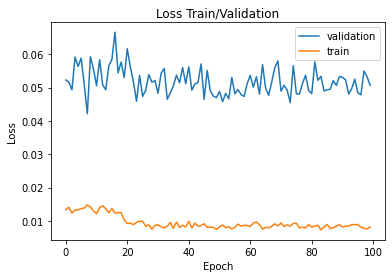

In [138]:
plt.plot(val_loss_hist,label='validation')
plt.plot(train_loss_hist,label='train')
plt.title('Loss Train/Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

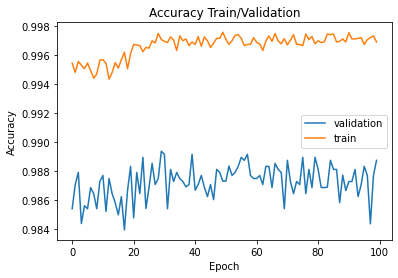

In [139]:
plt.plot(val_acc_hist,label='validation')
plt.plot(train_acc_hist,label='train')
plt.title('Accuracy Train/Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

Predict on the test set and compute metrics of interest. 

In [143]:
with torch.set_grad_enabled(False):
    # store all info in this variable
    pred_obs = {'pred': list(), 'obs': list()}
    for inputs, labels in test_loader:
        # Transfer to GPU
        inputs, labels = inputs.to(device), labels.to(device)
        # predict test data - run model forward
        predictions = model(inputs)
        # store predicted and observed (ground truth values)
        pred_obs['pred'].extend(predictions.cpu().numpy())
        pred_obs['obs'].extend(labels.cpu().numpy())

pred_obs['pred'] = np.array(pred_obs['pred'])
pred_obs['obs'] = np.array(pred_obs['obs'])

In [144]:
pred_obs

{'pred': array([[1.0000000e+00],
        [1.0000000e+00],
        [1.0000000e+00],
        ...,
        [9.9999964e-01],
        [1.2068890e-06],
        [3.4702989e-05]], dtype=float32),
 'obs': array([1., 1., 1., ..., 1., 0., 0.], dtype=float32)}

In [152]:
pred = pred_obs['pred']
pred = np.where(pred < 0.5,0,1)
obs = pred_obs['obs']

In [153]:
from sklearn.metrics import f1_score
f1_score(np_y_true,np_y_pred)

0.9767441860465117

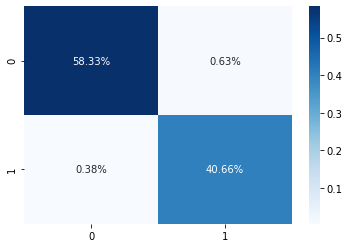

In [154]:
from sklearn.metrics import confusion_matrix
CFM = confusion_matrix(pred,obs)

import seaborn as sns
sns.heatmap(CFM/np.sum(CFM),annot=True,fmt='.2%',cmap = 'Blues')

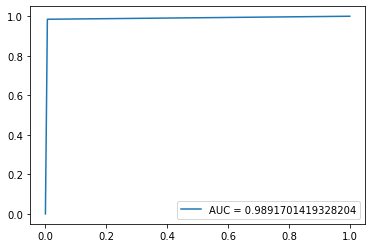

In [155]:
from sklearn.metrics import roc_auc_score,roc_curve

auc =roc_auc_score(obs,pred)

fpr,tpr,__ = roc_curve(obs,pred)
plt.plot(fpr,tpr,label = 'AUC = '+str(auc))
plt.legend(loc=4)
plt.show()